In [4]:
import torch
import torchvision
from IPython import display
import matplotlib.pyplot as plt
import matplotlib_inline
import sys
import numpy as np
from mpl_toolkits import mplot3d

In [5]:
def f(x):
    return x*np.cos(np.pi*x)

In [6]:
def set_figure_svg():
    display.set_matplotlib_formats('svg')
def set_figure_size(figsize=(12,12)):
    set_figure_svg()
    plt.rcParams['figure.figsize'] = figsize

/tmp/ipykernel_1244/3339345236.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


Text(0, 0.5, 'f(x)')

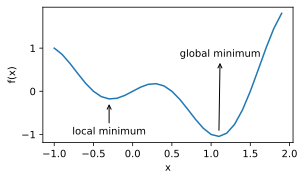

In [7]:
set_figure_size((4.5,2.5))
x = np.arange(-1.0,2.0,0.1)
fig, = plt.plot(x,f(x))
fig.axes.annotate('local minimum',xy=(-0.3,-0.25),xytext=(-0.77,-1.0),arrowprops=dict(arrowstyle='->'))
fig.axes.annotate('global minimum',xy=(1.1,-0.95),xytext=(0.6,0.8),arrowprops=dict(arrowstyle='<-'))
plt.xlabel('x')
plt.ylabel('f(x)')

epoch 10,x: 3.4867844009999995
[10, 9.0, 8.1, 7.289999999999999, 6.560999999999999, 5.9049, 5.31441, 4.782969, 4.3046720999999994, 3.8742048899999997, 3.4867844009999995]


/tmp/ipykernel_1244/3339345236.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


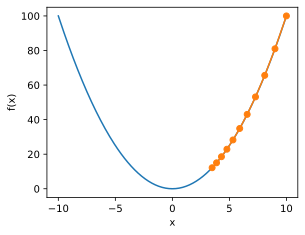

In [10]:
def gd(eta):
    x = 10
    output=[10]
    for i in range(x):
        x -=eta*2*x
        output.append(x)
    print('epoch 10,x:',x)
    return output
res = gd(0.05)
print(res)
def show_trace(res):
    n = max(abs(min(res)),abs(max(res)),10)
    f_line = np.arange(-n,n,0.1)
    set_figure_size(figsize=(4.5,3.5))
    plt.plot(f_line,[x*x for x in f_line])
    plt.plot(res,[x*x for x in res],'-o')
    plt.xlabel('x')
    plt.ylabel('f(x)')
show_trace(res)

In [11]:
def train_2d(trainer):
    x1,x2,s1,s2 = -5,-2,0,0
    result=[(x1,x2)]
    for i in range(20):
        x1,x2,s1,s2 = trainer(x1,x2,s1,s2)
        result.append((x1,x2))
    print('epoch:%d,x1:%.f,x2:%.f'%(i+1,x1,x2))
    return result
def show_trace_2d(f,result):
    plt.plot(*zip(*result),'-o',color='#ff7f0e')
    x1,x2 = np.meshgrid(np.arange(-5.5,1.0,0.1),np.arange(-3.0,1.0,0.1))
    plt.contour(x1,x2,f(x1,x2),colors='#1f77b4')
    plt.xlabel('x')
    plt.ylabel('f(x)')
eta = 0.1
def f_2d(x1,x2):
    return x1**2+2*x2**2
def gd_2d(x1,x2,s1,s2):
    x1 = x1-eta*2*x1
    x2 = x2-eta*4*x2
    s1= 0 
    s2=0
    return x1,x2,s1,s2

epoch:20,x1:-0,x2:-0


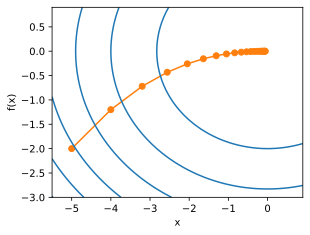

In [12]:
show_trace_2d(f_2d,train_2d(gd_2d))